<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/Lab4_ra%C3%ADces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 4.- Raíces de ecuaciones no lineales
<br>

El propósito de los métodos numéricos para búsqueda de raíces para ecuaciones no lineales es encontrar la raíz - o el valor de la variable independiente, ej. x - que hace que la ecuación  valga cero . La forma general de la búsqueda de raíces para ecuaciones no lineales se puede describir como:

Encontrar una  $x$ tal que
\begin{equation}
f(x) = 0
\end{equation}

Alternativamente, se puede presentar el problema como:

Encontrar una  $x$ tal que 
\begin{equation}
f(x) = a
\end{equation}

Si igualamos la ecuación a 0 forma residual tenemos
\begin{equation}
r(x) \equiv f(x) - a
\end{equation}
y el problema se centra en encontrar una  $x$ tal que 
\begin{equation}
r(x) = 0
\end{equation}


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


In [0]:
from sympy import *
#init_printing()

In [0]:
import sympy
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)
init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [0]:
def bisec(f,a,b,tol, maxiter,verbose = False):
    err = tol + 100
    niter = 0
    if verbose == True:
        print('{:<12} {:<12} {:<12} {:<12}'.format('Iteration','a','b','error'))
    while err > tol and niter < maxiter:
        niter +=1
        c = (a + b)/2.0
        fc = f(c)
        fa = f(a)
        if (fa * fc < 0.0):
            b = c
        else:
            a = c
        err = abs(fc)
        if verbose == True:
            print('{:<12} {:<12} {:<12} {:<12}'.format(niter, round(a,6), round(b,6), round(err,10)))
    if niter == maxiter:
        print('Iterations alcanzadas sin solucion =',niter)
    else:
        print('solución %8.6f' % (c))
        print('alcanzada en %3d iteraciones' % (niter))
        print('valor de la función = %12.10f' % (f(c)))
    return  c

In [0]:
def newton(f,df,x0,tol,maxiter,verbose):
    niter = 0
    err = tol + 100
    if verbose == 1:
        print('{:<12} {:<12} {:<12}'.format('Iteración','x1','error'))
    while err > tol and niter < maxiter:
        x1 = x0 - f(x0)/df(x0)
        x0 = x1
        err = abs(f(x0))
        niter += 1
        if verbose == 1:
            print('{:<12} {:<12} {:<12}'.format(niter, round(x1,6), round(err,10)))
    if niter == maxiter:
        print('Iteraciones alcanzadas sin solucion =',niter)
    else:
        print('solución %8.6f' % (x1))
        print('alcanzada en %3d iteraciones' % (niter))
        print('valor de la función = %12.10f' % (f(x1)))
    return  x1         

In [0]:
def newton2(f,x0,tol,maxiter,verbose):
    niter = 0
    err = tol + 100
    if verbose == 1:
        print('{:<12} {:<12} {:<12}'.format('Iteración','x1','error'))
    while err > tol and niter < maxiter:
        h = 1e-6 
        df = (f(x0 + h) - f(x0-h))/(2*h)
        x1 = x0 - f(x0)/df
        x0 = x1
        err = abs(f(x0))
        niter += 1
        if verbose == 1:
            print('{:<12} {:<12} {:<12}'.format(niter, round(x1,6), round(err,10)))
    if niter == maxiter:
        print('Iteraciones alcanzadas sin solucion =',niter)
    else:
        print('solución %8.6f' % (x1))
        print('alcanzada en %3d iteraciones' % (niter))
        print('valor de la función = %12.10f' % (f(x1)))
    return   x1    

In [0]:

def Newton_raphson(F, J, x, eps):
    """
    Resolución del sistema no lineal F=0  con el método de  Newton.
    J es el jacobiano de F. Ambos F y J deben ser función de  x.
    El vector  x  contiene los valores de inicio para las raíces.
    Las iteraciones continúan hasta que until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 20:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print('iteración',iteration_counter)
    # Hay una solución, o demasiadas iteraciones
    if abs(F_norm) > eps:
        iteration_counter = -1  #no hay solucion en las iteraciones indicadas
    return x, iteration_counter


In [0]:
## Aproximación del Jacobiano mediante diferencias finitas, 
# le pasamos el vector de funciones f y el vector de valores
#iniciales x.
# se llama dentro de la función Newton_raphson2
def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac
    

In [0]:
def Newton_raphson2(F, x, eps): 
    """
    Resolución del sistema no lineal F=0  con el método de  Newton.
    J es el jacobiano "aproximado"de F que se obtiene llamando a la función 
    "jacobian". x debe pasarse como un array de FLOATS.
    El vector  x  contiene los valores de inicio para las raíces.
    Las iteraciones continúan hasta que until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 20:
        #print('F_value',F_value)
        J=jacobian(F,x)
        #print('J',J)
        delta = np.linalg.solve(J, -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print('iteración',iteration_counter)
    # Hay una solución, o demasiadas iteraciones
    if abs(F_norm) > eps:
        iteration_counter = -1  #no hay solucion en las iteraciones indicadas
    return x, iteration_counter

## 1.- Una esfera que flota

 Si depositamos un sólido en la superficie de un líquido, de acuerdo con el teorema de Arquímedes, el sólido se sumergirá hasta una cierta profundidad de forma que el peso del sólido sea igual al peso de fluido desplazado

<img src="https://drive.google.com/uc?id=1TqKOPCLTFu05fnoCt0JHCjFLdU0qe5zf" alt="Lamp" width="220" height="120">

Tenemos una esfera como la de la foto de radio R = 1 m y que está sumergida hasta una profundidad H. Determinar cuánto se hunde la esfera si el peso de la niña es de 25 kg y la esfera de plástico pesa 2 kg. La densidad del agua $\rho_{a}$ es $1000 \,kg/m^{3}$ . El error máximo cometido ha de ser de un milímetro.

#### El volumen sumergido de la esfera  se puede representar como indica la siguiente figura

<img src="https://drive.google.com/uc?id=136Z7FWPfm3clkPL7GVvP8EKkKdSMkuBb" alt="Lamp" width="220" height="120">

 El volumen sumergido se puede calcular como <br><br>
$\displaystyle V=\int_{R-H}^{R}\pi f(x)^{2} = \int_{R-H}^{R}\pi (R^{2}-x^{2})dx$

Para R = 1 m el volumen es

In [0]:
x,H,R  = symbols('x,H,R')
f= pi *(1-x**2)
i=integrate(f, (x, 1-H, 1))
print(latex(i))

\frac{\pi}{3} \left(- H + 1\right)^{3} - \pi \left(- H + 1\right) + \frac{2 \pi}{3}


$\frac{\pi}{3} \left(- H + 1\right)^{3} - \pi \left(- H + 1\right) + \frac{2 \pi}{3}$

In [0]:
i

          3                   
π⋅(-H + 1)                 2⋅π
─────────── - π⋅(-H + 1) + ───
     3                      3 

In [0]:
print(latex(simplify(i)))

\frac{\pi H^{2}}{3} \left(- H + 3\right)


$\frac{\pi H^{2}}{3} \left(- H + 3\right)$

In [0]:
simplify(i)

   2         
π⋅H ⋅(-H + 3)
─────────────
      3      

## $V=\frac{\pi}{3}(3H^{2}-H^{3})$

### Y el peso del volumen desalojado

### $P=V*\rho_{a} = V*1000=25+2=27$

## $\frac{\pi }{3}(3H^{2}-H^{3})=0.027$

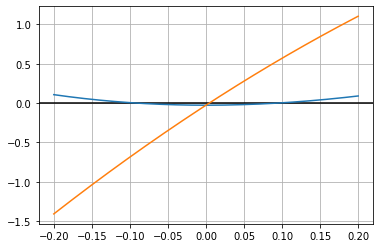

In [0]:
def esfera(H):
    return np.pi/3*(3*H**2-H**3)-0.027
def esferaprima(H):
    return np.pi/3*(6*H-3*H**2)-0.027
x = np.linspace(-0.2,0.2,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,esfera(x))
plt.plot(x,esferaprima(x))

In [0]:

x0 = symbols('x0')
F0 = pi/3*(3*x0**2-x0**3)-0.027
print(latex(diff(F0, x0)))
#print(diff(F0, x0))
#diff(F0, x0)

\frac{\pi}{3} \left(- 3 x_{0}^{2} + 6 x_{0}\right)


$\frac{\pi}{3} \left(- 3 x_{0}^{2} + 6 x_{0}\right)$

$\displaystyle \frac{\pi \left(- 3 x_{0}^{2} + 6 x_{0}\right)}{3}$


In [0]:
sol = bisec(esfera,0,1,1e-5, 50)


solución 0.094208
alcanzada en  15 iteraciones
valor de la función = 0.0000063919


In [0]:
sol =newton(esfera,esferaprima,0.5,1e-5, 50,0)

solución 0.094202
alcanzada en   5 iteraciones
valor de la función = 0.0000030255


In [0]:
sol = newton2(esfera,0.9,1e-5, 50,0)

solución 0.094203
alcanzada en   5 iteraciones
valor de la función = 0.0000037755


## 2 . La ecuación de Bernoulli para el flujo de fluido en una tubería abierta con una pequeña protuberancia es



<img src="https://drive.google.com/uc?id=12ZdSXp5pL2UXm8xHnKRnX0XA9Y6onLbV" alt="Lamp" width="420" height="320">

$$\frac{Q^{2}}{2gb^{2}h_{0}^{2}}+h_{0} = \frac{Q^{2}}{2gb^{2}h^{2}}+h + H $$

Donde:<br>
$
Q = 1.2 \,m^{3}/s = $&nbsp;&nbsp; caudal de agua  <br>
$g = 9.81 \, m/s^{2} = $&nbsp;&nbsp;aceleración de la gravedad <br>
$b = 1.8 \, m = $&nbsp;&nbsp;ancho de la tubería <br>
$h_0 = 0.6 \,m = $&nbsp;&nbsp;altura del agua en la tubería <br>
$H = 0.075 \,m = $&nbsp;&nbsp;altura de la protuberancia <br>
$h = $&nbsp;&nbsp;altura del agua en la protuberancia <br>

    

Para los datos dados calcular $h$

Ayuda: Dividir ambos lados de la ecuación anterior por $h_0$. Introducir una nueva variable $\displaystyle u=\frac{h}{h_0}$. Operar y obtener $f(u)=0$. Resolver utilizando el método de la bisección.

$$\frac{Q^{2}}{2gb^{2}h_{0}^{3}}+ 1 = \frac{Q^{2}}{2gb^{2}h_{0}^{3}}\left(\frac{h_0}{h}\right)^{2}+ \frac{h}{h_0} + \frac{H}{h_0} $$

$$f(u)=\displaystyle \frac{Q^{2}}{2gb^{2}h_{0}^{3}}\left( 1-\frac{1}{u^{2}}\right)-u+ \left( 1-\frac{H}{h_0}\right)=0$$

$$\frac{Q^{2}}{2gb^{2}h_{0}^{3}}=\frac{(1.2)^{2}}{2(9.81)(1.8)^{2}(0.6)^{3}}=0.10487$$

$$1-\frac{H}{h_{0}}=1-\frac{0.075}{0.6}=0.875$$

$$f(u) = 0.10487\left( 1-\frac{1}{u^{2}}\right)-u+0.875 = 0$$

In [0]:
x = symbols('x')
F0 = 0.10487*(1-1/x**2)-x+0.875
print(latex(diff(F0, x)))
#print(diff(F0, x))
#diff(F0, x)

$-1 + \frac{0.20974}{x^{3}}$

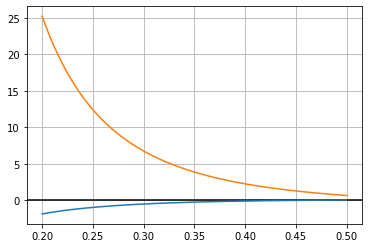

In [0]:
def bernoulli(x):
    y = 0.10487*(1-1/x**2)-x+0.875
    return y
def bernoullider(x):
    y = -1+(0.20974/x**3)
    return y


x = np.linspace(0.2,0.5,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,bernoulli(x))
plt.plot(x,bernoullider(x))

In [0]:
u = bisec(bernoulli,0.3,0.5,1e-5,50)

solución 0.441248
alcanzada en  14 iteraciones
valor de la función = -0.0000027198


In [0]:
u = newton(bernoulli,bernoullider,0.3,1e-5,50,0)

solución 0.441249
alcanzada en   5 iteraciones
valor de la función = -0.0000000064


In [0]:
h0=0.6
h = u*h0
print ('h es ',h)

h es  0.2647496646840147


### 3.- La velocidad $v$ de un cohete Saturno V cerca de la superficie terrestre se puede aproximar mediante

$\displaystyle v=u\ln\left(\frac{M_{0}}{M_{0}-\dot{m}t}\right)-gt$

Siendo :

$u = 2510\, m/s = $&nbsp; velocidad de salida de los gases de propulsión<br>
$M_{0} = 2.8 × 10^{6}\, kg = $&nbsp;masa del cohete al despegue<br>
$\dot m = 13.3 × 10^{3}\, kg/s = $&nbsp;velocidad de consumo de combustible<br>
$g = 9.81\, m/s^{2} = $&nbsp;aceleración de la gravedad<br>
$t = $&nbsp;tiempo medido desde el despegue

#### Determinar el tiempo en el que el cohete alcanza la velocidad del sonido $335 \,m/s$

$\displaystyle f(t)=u \ln \left [\frac {1}{1- \left( \frac {\dot m}{M_0} \right)t} \right ]-gt-v_{sound}=0 $

$\displaystyle f(t)= 2510 \,\ln \left (\frac {1}{1- 0.00475t} \right)-9.81t-335$

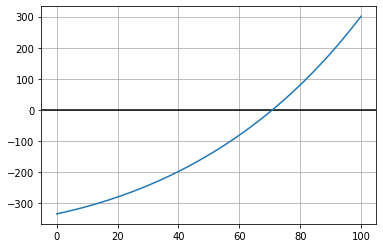

In [0]:
def cohete(x):
    y = 2510*np.log(1/(1-0.00475*x))-9.81*x-335
    return y

x = np.linspace(0,100,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,cohete(x))

In [0]:
x = symbols('x')
F0 = 2510*log(1/(1-0.00475*x))-9.81*x-335
#print(latex(diff(F0, x0)))
#print(diff(F0, x0))
print(latex(diff(F0, x)))

-9.81 + \frac{11.9225}{- 0.00475 x + 1}


$9.81 + \frac{11.9225}{- 0.00475 x + 1}$

In [0]:
def coheteder(x):
    y = -9.81 + (11.9225/(1-0.00475*x))
    return y

In [0]:
t = bisec(cohete,60,80,1e-5,50)

solución 70.877972
alcanzada en  20 iteraciones
valor de la función = -0.0000050526


In [0]:
t = newton(cohete,coheteder,30,1e-5, 50,0)

solución 70.877972
alcanzada en   5 iteraciones
valor de la función = 0.0000000000


In [0]:
t = newton2(cohete,40,1e-5, 50,0)

solución 70.877972
alcanzada en   4 iteraciones
valor de la función = 0.0000008514


#### 4.-  Un tanque de aceite cilíndrico de radio $r$ y longitud $L$ se llena hasta una profundidad $h$. El volumen $V$ resultante del aceite en el tanque es :

<img src="https://drive.google.com/uc?id=1yCot_xedOh44rNeMQTJmybJNTNTL0txz" alt="Lamp" width="220" height="120">

$ V_0 = \pi r^{2}L$

$\displaystyle V=r^{2}L\left[\phi-\left(1-\frac{h}{r}\right)\sin\phi\right] $

$\displaystyle \phi-\left(1-\frac{h}{r}\right)\sin\phi = 0.75 $

$\displaystyle \alpha  = 1 -\frac{h}{r} $

#### Siendo $\displaystyle \phi=\cos^{-1}\left(1-\frac{h}{r}\right) $

La ecuación a resolver es 
$\displaystyle 0.75 \pi -\left(\phi -\alpha \sin\phi \right) = 0 $

 Si el tanque está lleno 3/4 del volumen total determinat la relación $\displaystyle  \frac{h}{r}$

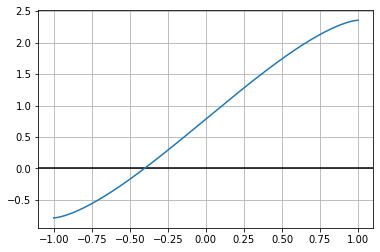

In [0]:
def tanque(x):
    phi = np.arccos(x)
    y = 0.75*np.pi - (phi-x*np.sin(phi))
    return y

x = np.linspace(-1,1,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,tanque(x))

In [0]:
alfa = bisec(tanque,-0.5,0.5,1e-5,50)

solución -0.403976
alcanzada en  16 iteraciones
valor de la función = -0.0000067458


In [0]:
print('Relacion h/r es 1-alfa',1-alfa)

Relacion h/r es 1-alfa 1.4039764404296875


#### 5.- Los sistemas mecánicos  implican la desviación de resortes no lineales. 
En la siguiente figura, un bloque de masa $m $ se libera a una distancia $h$ por
encima de un resorte no lineal. 
La resistencia la fuerza F del resorte viene dada por

<img src="https://drive.google.com/uc?id=17-8e6sqm2yaXWLegw8JzHcR-PocKWL_e" alt="Lamp" width="220" height="120">

Los sistemas mecánicos reales pueden implicar la desviación
de resortes no lineales. En la figura P6.20, un bloque de masa m es
liberado una distancia h por encima de un resorte no lineal. La resistencia
la fuerza F del resorte viene dada por

 La fuerza de resistencia $F$ del resorte viene dada por

$\displaystyle F=-\left(k_{1}d+k_{2}d^{3/2}\right)$

Por otro lado el principio de conservación de energía nos dice que:

$\displaystyle 0=\frac{2k_{2}d^{\frac{5}{2}}}{5}+\frac{1}{2}k_{1}d^{2}-mgd-mgh $

Encontrar  $d$, dados los siguientes valores: <br>
k1 = 40.000 g / $s^{2}$<br>
k2 = 40 g / ($s^{2} m^{0.5}$)<br>
m = 95 g<br>
g = 9.81 m / $s^{2}$<br>
h = 0,43 m.

Definamos
$
\displaystyle F(d) = \frac{2k_2d^{\frac{5}{2}}}{5}+\frac{1}{2}k_1d^{2}-mgd-mgh$

Mirando la gráfica escogemos el intervalo [0.1,0.2]

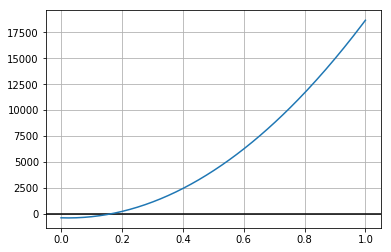

In [0]:
def Fuerza(x):
    y = (2*40*x**(5/2))/5 + 0.5*40000*x**(2)-95*9.81*x - 95*9.81*0.43
    return y

x = np.linspace(0,1,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,Fuerza(x))

In [0]:
d = bisec(Fuerza,0,0.25,1e-5,50)

solución 0.166724
alcanzada en  27 iteraciones
valor de la función = -0.0000001910


Respuesta d = 0.16672

#### 6.   La trayectoria de una pelota lanzado en un juego de béisbol por el lanzador derecho se define por las coordenadas (x, y) como se muestra en la figura . La trayectoria se puede modelar como

<img src="https://drive.google.com/uc?id=1zn1RpROm6xCQTKbZCn9FM6sSwBi15E-t" alt="Lamp" width="220" height="120">

$\displaystyle Y=\left(\tan\theta_{0}\right)x-\frac{g}{2v_{0}^{2}\cos^{2}\theta_{0}}x^{2}+y_{0} $

Encontrar el ángulo inicial apropiado $θ_0$, si $v_0 = 30\, m/s $, y la
 distancia al receptor es de $90\,m$. Tengamos en cuenta que el lanzamiento deja la
mano del lanzador  derecho a una altura de $1.8 \,m$ y el receptor recibe la pelota a 
$1\, m$ de altura. $y_0$ es la altura a la que el receptor atrapa la pelota.

Si la altura a la que la pelota abandona el brazo del lanzador es $y = 0$ para $x=0$ entonces  $y\, a \,90 \, mts $ es -0.8 mts cuando el receptor coge la pelota, con lo que tenemos la ecuación

$\displaystyle F(\theta_0) = -0.8-(\tan\theta_o)x+\frac{g}{2v_0^{2}\cos^{2}\theta_0}x^{2}$

Sustituyendo por los valores conocidos


$\displaystyle F(\theta_0) = -0.8-90\tan\theta_0+\frac{9.81}{2*30^{2}\cos^{2}\theta_0}90^{2}$

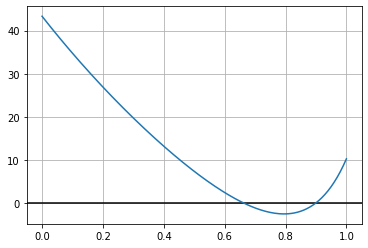

In [0]:
def Pelota(x):
    y = -0.8 -90*np.tan(x)+((9.81)/(2*30**(2)*(np.cos(x))**2 ))*90**2
    return y

x = np.linspace(0,1,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,Pelota(x))

Dibujando vemos que las raices están en {0.6,0.7] y [0.8,1] estando los ángulos en radianes

In [0]:
theta = bisec(Pelota,0.8,1,1e-5,50)

solución 0.899398
alcanzada en  19 iteraciones
valor de la función = -0.0000019303


In [0]:
print('theta es',theta*180/np.pi)

theta es 51.531733695146535


In [0]:
theta = bisec(Pelota,0.6,1,1e-5,50)

solución 0.662509
alcanzada en  17 iteraciones
valor de la función = 0.0000020089


In [0]:
print('theta es',theta*180/np.pi)

theta es 37.958978485945295


**Solución 37.96 o 51.53 grados **

### Sistemas de ecuaciones no lineales

## 1.- Determinar los puntos de intersección entre el círculo $ x^{2} + y^{2} = 3 $ y la hipérbola $xy = 1$.

Las ecuaciones son:
$$f1(x, y) = x^{2} + y^{2} − 3 =0$$ 
$$f2(x, y) = xy − 1 =0$$

In [0]:
## PODEMOS COMPROBAR QUE NUESTRO JACOBIANO ESTE BIEN CALCULADO CON UTILIZANDO
## LA LIBRERIA DE CALCULO SIMBOLICO  SYMPY


x0, x1 = symbols('x0 x1')
X = Matrix([x0**2+x1**2-3,x0*x1-1])
Y = Matrix([x0, x1])
X.jacobian(Y)

⎡2⋅x₀  2⋅x₁⎤
⎢          ⎥
⎣ x₁    x₀ ⎦

$$\left[\begin{matrix}2 x_{0} & 2 x_{1}\\x_{1} & x_{0}\end{matrix}\right]$$

<img src="https://drive.google.com/uc?id=1HAdRKQe1fZFIrnCGxryG-0nWblnkFKly" alt="Lamp" width="220" height="120">


Encontrar un sólo punto de intersección, los demás son simétricos, 
los valores iniciales estimados son $x = 0.5 \,\, y = 1.5$<br>

1.- Hacer  $x_0 = x$ y $x1 =y$ <br> 
2.- Obtener el JACOBIANO de forma analítica <br>
2.-Utilizar el método de Newton-Raphson para  encontrar la solución


In [0]:
#DEFINICIÓN DEL VECTOR DE FUNCIONES Y SU JACOBIANO
def F0(x):
    return np.array([x[0]**2+x[1]**2-3,
                     x[0]*x[1]-1])

def J0(x):
    return np.array([[2*x[0], 2*x[1]],
                     [x[1], x[0]]])


In [0]:
x, n = Newton_raphson(F0, J0, x=np.array([0.5, 1.5]), eps=0.0001)
print ('Iteraciones y soluciones ',n, x)

iteración 1
iteración 2
iteración 3
Iteraciones y soluciones  3 [0.61803399 1.61803399]


In [0]:
x, n = Newton_raphson2(F0, x=np.array([0.5, 1.5]), eps=0.0001)
print ('Iteraciones y soluciones ',n, x)

iteración 1
iteración 2
iteración 3
Iteraciones y soluciones  3 [0.61803399 1.61803399]


** solución  x=0.61803  y = 1.61803 **

## 2.-  La trayectoria de un satélite que orbita la tierra es

<img src="https://drive.google.com/uc?id=13aWwkPQAVwLE-Iaa0rDevLSRqyU4nk6L" alt="Lamp" width="220" height="120">

The trajectory of a satellite orbiting the earth is

$ \displaystyle R =\frac{C}{1+e\sin(\theta+\alpha)}$

where (R, θ) are the polar coordinates of the satellite, and C, e, and α are constants
(e is known as the eccentricity of the orbit). If the satellite was observed at
the following three positions


| $ \theta$ | -30º | 0º | 30º |
| --- | --- | --- | --- |
| R (Km) | 6870 | 6728 | 6615 |

determine the smallest R of the trajectory and the corresponding value of θ.

Obtenemos el siguiemte conjunto de ecuaciones

\begin{align}
&\frac{C}{1+e\sin(-\pi/6+\alpha)} - 6870  = 0 \\ 
&\frac{C}{1+e\sin(\alpha)} - 6728 = 0 \\
&\frac{C}{1+e\sin(\pi/6+\alpha)} - 6615 = 0
\end{align}

In [0]:

x0,x1,x2 = symbols('x0 x1 x2')
F0 = x0/(1+x1*sin(-pi/6+x2))-6870
F1 = x0/(1+x1*sin(x2))-6728
F2 = x0/(1+x1*sin(pi/6+x2))-6615

X = Matrix([F0, F1, F2])
Y = Matrix([x0, x1,x2])
X.jacobian(Y)


⎡                                 ⎛     π⎞                  ⎛     π⎞   ⎤
⎢                           x₀⋅cos⎜x₂ + ─⎟        -x₀⋅x₁⋅sin⎜x₂ + ─⎟   ⎥
⎢         1                       ⎝     3⎠                  ⎝     3⎠   ⎥
⎢────────────────────  ───────────────────────  ───────────────────────⎥
⎢        ⎛     π⎞                            2                        2⎥
⎢- x₁⋅cos⎜x₂ + ─⎟ + 1  ⎛        ⎛     π⎞    ⎞   ⎛        ⎛     π⎞    ⎞ ⎥
⎢        ⎝     3⎠      ⎜- x₁⋅cos⎜x₂ + ─⎟ + 1⎟   ⎜- x₁⋅cos⎜x₂ + ─⎟ + 1⎟ ⎥
⎢                      ⎝        ⎝     3⎠    ⎠   ⎝        ⎝     3⎠    ⎠ ⎥
⎢                                                                      ⎥
⎢         1                  -x₀⋅sin(x₂)            -x₀⋅x₁⋅cos(x₂)     ⎥
⎢   ──────────────        ─────────────────        ─────────────────   ⎥
⎢   x₁⋅sin(x₂) + 1                        2                        2   ⎥
⎢                         (x₁⋅sin(x₂) + 1)         (x₁⋅sin(x₂) + 1)    ⎥
⎢                                                  

$$\left[\begin{matrix}\frac{1}{- x_{1} \cos{\left (x_{2} + \frac{\pi}{3} \right )} + 1} & \frac{x_{0} \cos{\left (x_{2} + \frac{\pi}{3} \right )}}{\left(- x_{1} \cos{\left (x_{2} + \frac{\pi}{3} \right )} + 1\right)^{2}} & - \frac{x_{0} x_{1} \sin{\left (x_{2} + \frac{\pi}{3} \right )}}{\left(- x_{1} \cos{\left (x_{2} + \frac{\pi}{3} \right )} + 1\right)^{2}}\\\frac{1}{x_{1} \sin{\left (x_{2} \right )} + 1} & - \frac{x_{0} \sin{\left (x_{2} \right )}}{\left(x_{1} \sin{\left (x_{2} \right )} + 1\right)^{2}} & - \frac{x_{0} x_{1} \cos{\left (x_{2} \right )}}{\left(x_{1} \sin{\left (x_{2} \right )} + 1\right)^{2}}\\\frac{1}{x_{1} \sin{\left (x_{2} + \frac{\pi}{6} \right )} + 1} & - \frac{x_{0} \sin{\left (x_{2} + \frac{\pi}{6} \right )}}{\left(x_{1} \sin{\left (x_{2} + \frac{\pi}{6} \right )} + 1\right)^{2}} & - \frac{x_{0} x_{1} \cos{\left (x_{2} + \frac{\pi}{6} \right )}}{\left(x_{1} \sin{\left (x_{2} + \frac{\pi}{6} \right )} + 1\right)^{2}}\end{matrix}\right]$$

In [0]:
def F0(x):
    return np.array([x[0]/(1+x[1]*np.sin(-np.pi/6+x[2]))-6870,
                     x[0]/(1+x[1]*np.sin(x[2]))-6728,
                     x[0]/(1+x[1]*np.sin(np.pi/6+x[2]))-6615])

def J0(x):
    return np.array([[2*x[0] + np.cos(np.pi*x[0]) - np.pi*x[0]*np.sin(np.pi*x[0]),
                      -1.],[x[1] + x[0]**(-2.), x[0] - np.exp(-x[1])]])


Haciendo $C=x_0$ $e=x_1$ y $\alpha=x_2$ Utilizar como valores iniciales 6800,0.5,0

In [0]:
x, n = Newton_raphson2(F0, x=np.array([6800, 0.5,0],dtype=float), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
7 [6.81929379e+03 4.05989591e-02 3.40783998e-01]


Los valores mínimos son 
$\displaystyle R_{min} = \frac{C}{1+e}$ <br>
que tiene lugar cuando
$\displaystyle \sin(\theta+\alpha) = 1 \,\,\, \theta = \frac{\pi}{2}-\alpha$

Solucion <br>
C = 6.81929379E+03 <br>
e= 4.05989591E-02 <br>
alfa = 0,340783998 <br>
Rmin = 6553.239107 Km <br>
Theta = 70.474515 deg <br>


## 3.- Un proyectil se lanza desde el punto O con una velocidad  v y un ángulo θ.  Las ecuaciones paramétricas de la trayectoria son:

A projectile is launched at O with the velocity v at the angle θ to the horizontal.
The parametric equations of the trajectory are

<img src="https://drive.google.com/uc?id=1mXs108No003xzu86fd0bQsvXNAjfOObM" alt="Lamp" width="220" height="120">

$\displaystyle x=(v\cos\theta)t$<br>
$\displaystyle y=-\frac{1}{2}gt^{2}+(v\sin\theta)t$


where t is the time measured from the instant of launch, and g = 9.81 m/s2 represents
the gravitational acceleration. If the projectile is to hit the target A at the
45◦ angle shown in the figure, determine v, θ, and the time of flight.

Necesitamos encontrar $\displaystyle \frac{dy}{dx}$

$\displaystyle \frac{dx}{dt} = v\cos\theta \,\,\,\,\frac{dy}{dt}=-gt+v\sin\theta $<br><br>
$\displaystyle \frac{dy}{dx} = \frac{-gt+v\sin\theta}{v\cos\theta} $

Haciendo $\tau$ el tiempo de vuelo, las especificaciones finales nos dicen que

$\displaystyle x(\tau) = 300\,m\,\,\, y(\tau) = 61 \, m \,\,\,y \,\,\,   \left. \frac{dy}{dx} \right |_{\tau}= -1$

que os permite escribir las siguientes ecuaciones

\begin{align}
& (v\cos\theta)\tau-300 = 0\\ 
& -\frac{1}{2}gt^{2}+(v\sin\theta)\tau-61 = 0\\
& \frac{-g\tau+v\sin\theta}{v\cos\theta}+1= 0
\end{align}

Podemos empezar con valores como $\tau = 10\, s$ y $\theta = 45º$
con lo que la primera ecuación nos da $\displaystyle v = \frac{300}{\tau\cos\theta}= 57\,\,m/s.$
Utilizaremos la notación $\tau = x_0 \,\,\, , v = x_1 \,\,y\,\, \theta = x_2$

In [0]:
def F0(x):
    return np.array([x[1]*np.cos(x[2])*x[0]-300,
                     -0.5*9.81*x[0]**2+x[1]*np.sin(x[2])*x[0]-61,
                     (-9.81*x[0]+x[1]*np.sin(x[2]))/(x[1]*np.cos(x[2]))+1])

In [0]:
x, n = Newton_raphson2(F0, x=np.array([10, 57,0.78],dtype=float), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
4 [ 8.5789492  60.35334577  0.95279201]


In [0]:
print('theta es', x[2]*180/np.pi)

theta es 54.5909610115005


Solucion tiempo de vuelo 8.5789 s <br>
Velocidad de lanzamiento 60.3533459 <br>
Angulo de elevación = 54.5909 grados 


## 4.- Un cable de 15 m está suspendido entre A y D y soporta cargas concentradas en B y C. Las ecuaciones de equilibrio vertical de las uniones B y C son:

<img src="https://drive.google.com/uc?id=1ejnVSuAxHGKci4JhSP0wYE6kYva8SpsR" alt="Lamp" width="220" height="120">


donde T es el componente horizontal de la fuerza del cable (es el mismo en todos los segmentos.
Además, hay dos restricciones geométricas impuestas por Las posiciones de los soportes:




$$ T(-\tan \theta_2 +\tan \theta_1)=16 $$
$$ T(\tan \theta_3 +\tan \theta_2)= 20 $$


$$ -4 \sin \theta_1 -6 \sin \theta_2 +5 \sin \theta_3 = -3 $$
$$ 4 \cos \theta_1 + 6 \cos \theta_2 + 5 \cos \theta_3 = 12$$

In [0]:
def F0(x):
    return np.array([ x[0]*(-np.tan(x[2])+np.tan(x[1]))-16,
                      x[0]*(np.tan(x[3])+np.tan(x[2]))-20,
                     -4*np.sin(x[1]) - 6*np.sin(x[2])+ 5*np.sin(x[3])+3,
                      4*np.cos(x[1]) + 6*np.cos(x[2])+ 5*np.cos(x[3])-12 ])

In [0]:

x0,x1,x2,x3 = symbols('x0 x1 x2 x3')
FA = x0*(-tan(x2)+tan(x1))-16
FB = x0*(tan(x3)+tan(x2))-20
FC = -4*sin(x1)-6*sin(x2)+5*sin(x2)+3
FD = 4*cos(x1)+6*cos(x2)+5*cos(x3)-12
X = Matrix([FA, FB, FC, FD])
Y = Matrix([x0, x1,x2,x3])
X.jacobian(Y)


⎡                      ⎛   2        ⎞     ⎛     2        ⎞                   ⎤
⎢tan(x₁) - tan(x₂)  x₀⋅⎝tan (x₁) + 1⎠  x₀⋅⎝- tan (x₂) - 1⎠          0        ⎥
⎢                                                                            ⎥
⎢                                          ⎛   2        ⎞      ⎛   2        ⎞⎥
⎢tan(x₂) + tan(x₃)          0           x₀⋅⎝tan (x₂) + 1⎠   x₀⋅⎝tan (x₃) + 1⎠⎥
⎢                                                                            ⎥
⎢        0             -4⋅cos(x₁)           -cos(x₂)                0        ⎥
⎢                                                                            ⎥
⎣        0             -4⋅sin(x₁)          -6⋅sin(x₂)          -5⋅sin(x₃)    ⎦

$$\left[\begin{matrix}\tan{\left (x_{1} \right )} - \tan{\left (x_{2} \right )} & x_{0} \left(\tan^{2}{\left (x_{1} \right )} + 1\right) & x_{0} \left(- \tan^{2}{\left (x_{2} \right )} - 1\right) & 0\\\tan{\left (x_{2} \right )} + \tan{\left (x_{3} \right )} & 0 & x_{0} \left(\tan^{2}{\left (x_{2} \right )} + 1\right) & x_{0} \left(\tan^{2}{\left (x_{3} \right )} + 1\right)\\0 & - 4 \cos{\left (x_{1} \right )} & - \cos{\left (x_{2} \right )} & 0\\0 & - 4 \sin{\left (x_{1} \right )} & - 6 \sin{\left (x_{2} \right )} & - 5 \sin{\left (x_{3} \right )}\end{matrix}\right]$$

Tenemos entonces 4 ecuaciones y cuatro incógnitas

**Determinar los ángulos θ1, θ2, θ3 y T . Utilzando Newton Raphson**

** Determinar los ángulos θ1, θ2, θ3 y T . **<br>
1.- Hacer $x_0= T \,\,x_1=\theta1\,\,x_2=\theta2\,\,x_3=\theta3$ <br>
2.- Utilizar Newton Raphson con valores aproximados θ1 = 0.8 rad θ2 = 0.3 rad θ3 = 0.4 rad T = 20 kN. Probar con la versión del algoritmo que utiliza el Jacobiano y la versión con Jacobiano aproximado

In [0]:
x, n = Newton_raphson2(F0, x=np.array([20, 0.8,0.3,0.4],dtype=float), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
4 [17.88840896  0.93580275  0.43344988  0.58004954]


In [0]:
x, n = Newton_raphson2(F0, [20., 0.8,0.3,0.4], eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
4 [17.88840896  0.93580275  0.43344988  0.58004954]


** Solución <br>
θ1 = 0:9358 rad = 53,62 º <br>
θ2 = 0:4334 rad = 24,83 º <br>
θ3 = 0:5800 rad = 33,23 º <br>
T = 17,89 kN **
    